# PACKAGES USED 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
import pydotplus
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
from sklearn.mixture import GaussianMixture

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# CLASSIFICATION

# DECISION TREE

In [ ]:
df = pd.read_excel("/content/convertcsv.xlsx")
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
for j in df.columns:
  if(df[j].dtype=="object"):
    x=df[j].unique()
    d={}
    for i in range(len(x)):
      d[x[i]]=i
    df=df.replace({j:d})
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   class     1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [ ]:
X=np.array(df.iloc[:,0:len(df.columns)-1])
Y=np.array(df.iloc[:,len(df.columns)-1])

In [ ]:
dt = DecisionTreeClassifier(criterion = 'entropy')

In [ ]:
scores=[]
d={}
cv = KFold(n_splits=5)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    dt.fit(X_train, y_train)
    scores.append(dt.score(X_test, y_test))
    t=[]
    t.append(X_train)
    t.append(y_train)
    t.append(X_test)
    t.append(y_test)
    scores.append(dt.score(X_test, y_test))
    d[dt.score(X_test, y_test)]=t
v=max(d.keys())
scores

[0.8959537572254336,
 0.8959537572254336,
 0.8959537572254336,
 0.8959537572254336,
 0.9884393063583815,
 0.9884393063583815,
 0.7913043478260869,
 0.7913043478260869,
 0.8666666666666667,
 0.8666666666666667]

In [ ]:
dt.fit(d[v][0],d[v][1])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

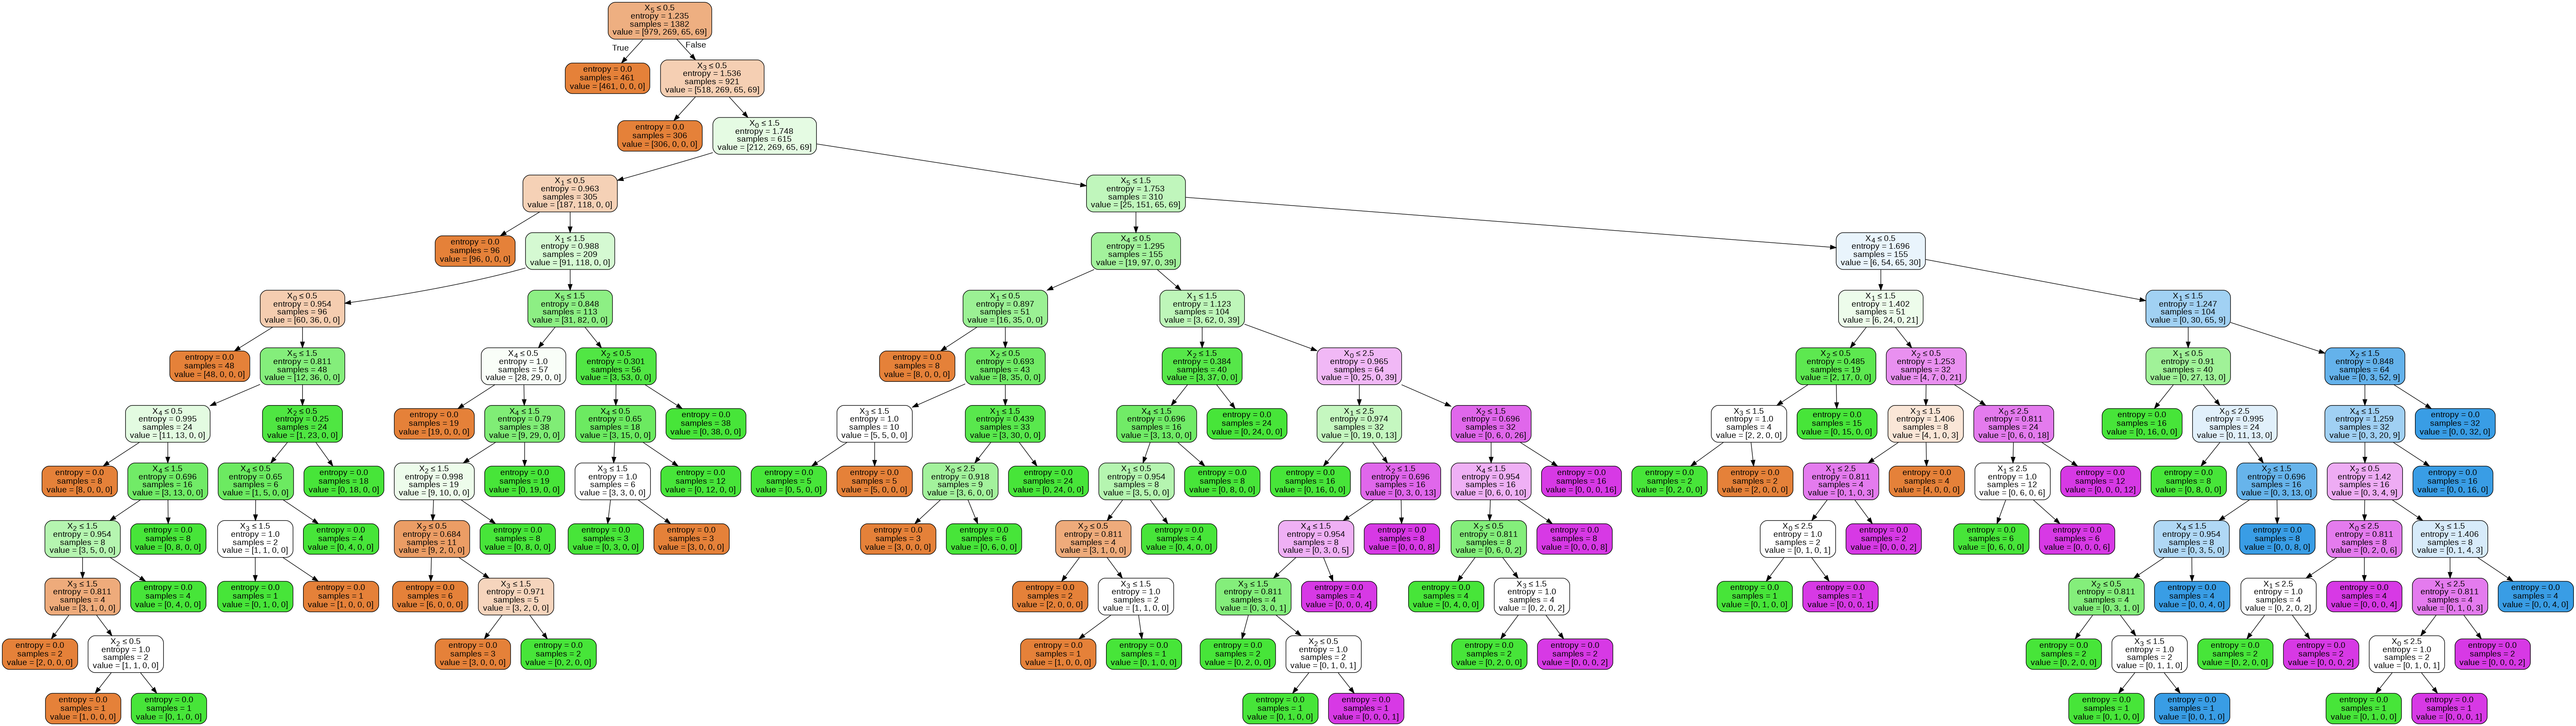

In [ ]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
               filled=True, rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=800, height=300)

In [ ]:
pred=dt.predict(d[v][2])
res={}
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(d[v][3], pred))
res['accuracy']=metrics.accuracy_score(d[v][3], pred)

Accucary: 0.9884393063583815


In [ ]:
metrics.r2_score(d[v][3], pred)

0.9479013739883305

In [ ]:
metrics.f1_score(d[v][3], pred,average='micro')

0.9884393063583815

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
y_score=dt.predict_proba(d[v][2])
y_score

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
y_test

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1,
       1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2,
       0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 2, 0, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 1, 3, 0, 3, 2, 0, 0, 0, 0, 1, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 1, 3, 0, 3, 2, 0, 1,
       3, 0, 3, 2, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 3, 2,
       0, 3, 2, 0, 1, 3, 0, 3, 2, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 3, 0, 3, 2, 0, 3, 2, 0, 1, 3, 0, 3, 2, 0, 3, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 3, 0, 1, 3, 0, 3, 2, 0, 0, 0, 0, 1, 3, 0, 3, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 1, 3, 0, 3, 2, 0, 1, 3, 0,
       3, 2, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

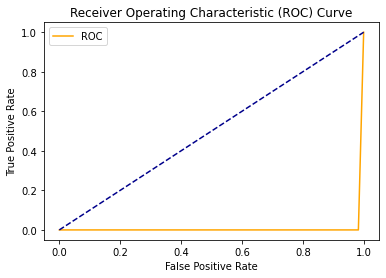

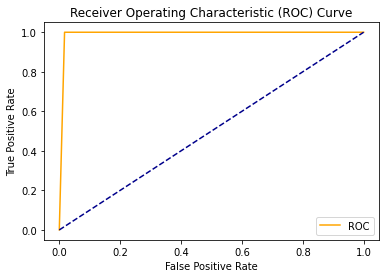

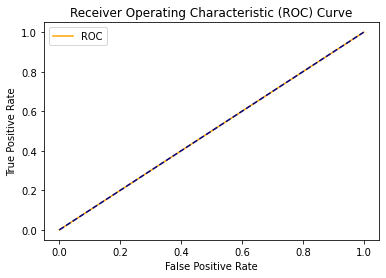

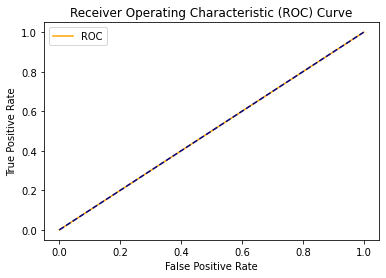

In [ ]:
for i in range(4):
  fpr1, tpr1, thresh1 = roc_curve(d[v][3], y_score[:,i], pos_label=1)
  plot_roc_curve(fpr1,tpr1)

# SVM

In [ ]:
sv = SVC(kernel = 'linear', C = 10,probability=True)

In [ ]:
scores=[]
d={}
cv = KFold(n_splits=5)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    sv.fit(X_train, y_train)
    scores.append(sv.score(X_test, y_test))
    t=[]
    t.append(X_train)
    t.append(y_train)
    t.append(X_test)
    t.append(y_test)
    scores.append(sv.score(X_test, y_test))
    d[sv.score(X_test, y_test)]=t
v=max(d.keys())
scores

[0.7485549132947977,
 0.7485549132947977,
 0.8554913294797688,
 0.8554913294797688,
 0.8179190751445087,
 0.8179190751445087,
 0.7739130434782608,
 0.7739130434782608,
 0.6579710144927536,
 0.6579710144927536]

In [ ]:
sv.fit(d[v][0],d[v][1])

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
pred=sv.predict(d[v][2])
pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,

In [ ]:
print('Accucary:', metrics.accuracy_score(d[v][3], pred))

Accucary: 0.8554913294797688


In [ ]:
metrics.r2_score(d[v][3], pred)

0.17240719479525446

In [ ]:
metrics.f1_score(d[v][3], pred,average='micro')

0.8554913294797687

In [ ]:
y_score=sv.predict_proba(d[v][2])
y_score

array([[6.33208925e-01, 3.59448952e-01, 2.44187126e-04, 7.09793561e-03],
       [1.26079544e-01, 8.47239765e-01, 6.24497757e-03, 2.04357135e-02],
       [9.22175980e-01, 7.66081510e-02, 4.14985612e-05, 1.17437083e-03],
       ...,
       [4.60143979e-01, 5.25796677e-01, 3.99795545e-03, 1.00613888e-02],
       [9.84089580e-01, 1.57930174e-02, 9.91703769e-06, 1.07485415e-04],
       [8.54102356e-01, 1.42840617e-01, 5.33273777e-04, 2.52375243e-03]])

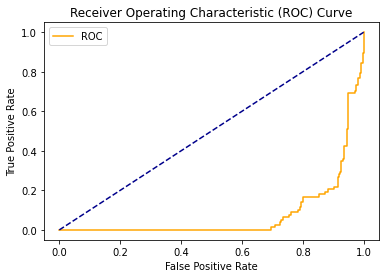

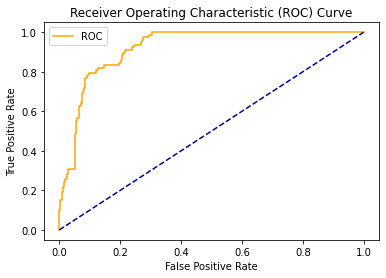

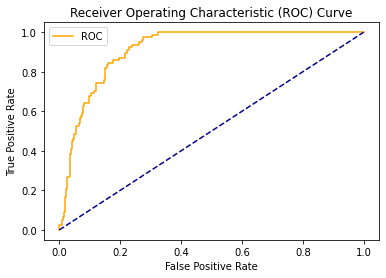

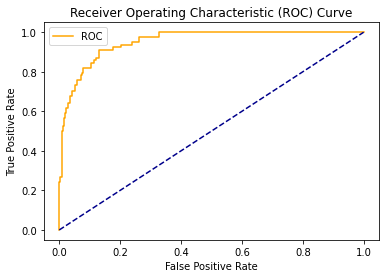

In [ ]:
for i in range(4):
  fpr1, tpr1, thresh1 = roc_curve(d[v][3], y_score[:,i], pos_label=1)
  plot_roc_curve(fpr1,tpr1)